<a href="https://colab.research.google.com/github/Edmontong/Bootcamp-25-midterm-Edmon-Alvina/blob/main/Midterm_Edmon%2BAlvina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Project -- Edmon + Alvina

Your midterm project will be a thematic exploration of a dataset of your choice/construction.  To begin, you are to identify a topical area of interest and whether or not you would be interested in working with a small group of your peers [here](https://docs.google.com/forms/d/e/1FAIpQLSeyrSEF1IsErHO_a1bVfcoOm2g5DbBD8rhZ_eyF4HwHkBQZVA/viewform?usp=header).



## Determining the Data Sources

For your data, you are to either build a dataset utilizing an API or identifying a website or sites to scrape.  These should be related to your topic of interest.  As a starting point, each group member should identify 2-3 resources in the form of an API or website(s) that look like they might be useful for your exploration.  Next class you will have time as a group to drill down specifics from the options you bring to the group.

## Exploratory Questions

You should come up with a few driving questions that you believe the data will give you insight into.  This is very general, and I give some examples of projects that I believe would be meaningful.  These are likely to change a bit as you dig into your data but work to be as specific about feature names and relationships or differences to be explored.

Companies: Apple (AAPL), Microsoft(MSFT
), Circle(CRCL), Nvidia(NVDA), Meta (META
), Alphabet (GOOG)


[yfinance guide](https://algotrading101.com/learn/yfinance-guide/)

In [12]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
!pip install yfinance
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
tickers = ['AAPL', 'MSFT', 'NVDA', 'META', 'GOOG']    #the companies we chose to get data on

#Price to Earnings Ratio

In [14]:
#Price to Earnings Ratio
data = {}

for ticker in tickers:

    stock = yf.Ticker(ticker)
    info = stock.info

    trailing_pe = info.get('trailingPE')   #trailing_pe -> the past 12 months
    forward_pe = info.get('forwardPE')     #forward_pe  -> the next 12 months

    data[ticker] = {
        'Trailing P/E': trailing_pe,
        'Forward P/E': forward_pe
    }

pe_df = pd.DataFrame.from_dict(data, orient = 'index')
pe_df.index.name = 'Ticker'
pe_df

,Trailing P/E,Forward P/E
Ticker,,
AAPL,39.376324,31.226230
MSFT,38.158356,34.814716
NVDA,51.772728,44.233013
META,26.648838,29.050396
GOOG,27.074707,28.345253


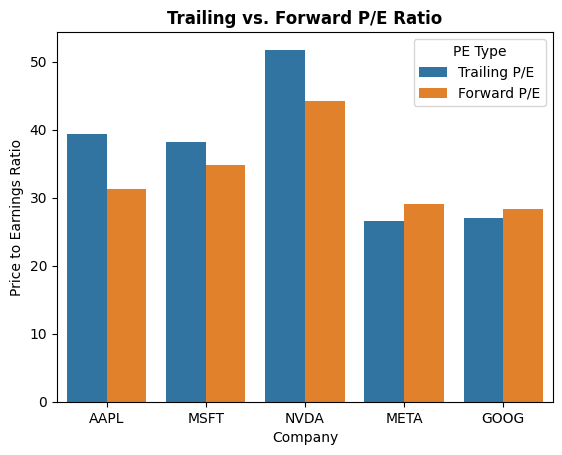

In [15]:
plot_df = pe_df.stack().reset_index()
plot_df.columns = ['Ticker', 'PE Type', 'PE Ratio']
sns.barplot(
    data=plot_df,
    x='Ticker',
    y='PE Ratio',
    hue='PE Type'
)

plt.xlabel('Company')
plt.ylabel('Price to Earnings Ratio')
plt.title('Trailing vs. Forward P/E Ratio', fontweight='bold');

##Free Cashflow

In [16]:
#Freecashflows
#Free cash flow = operating cf - investing cf
#Measure how much cash the company has left to paying dividends, buy back shares & debts, etc.
#reflecting how comfortable a company is; how much flexibility the company has
freecashflow = []
for ticker in tickers:
  ticker = yf.Ticker(ticker)
  cf = ticker.cashflow
  opc = cf.loc['Cash Flow From Continuing Operating Activities'] #get recent 4 years of operating cashflow
  icf = cf.loc['Cash Flow From Continuing Investing Activities'] #get recent 4 years of investing cashflow
  fcf = []
  for i,j in zip(opc, icf): #loop over each year's opc and icf for each company
    k = i - j #each year's fcf
    fcf.append(k) #list of fcf for 4 recent years
  freecashflow.append(fcf)
df_fcf = pd.DataFrame(freecashflow, columns=['2025','2024','2023','2022','2021'])
df_fcf.index = tickers
df_fcf.T.dropna()


,AAPL,MSFT,NVDA,META,GOOG
2025,1.153190e+11,2.087610e+11,8.451000e+10,1.384780e+11,1.708350e+11
2024,1.068380e+11,2.155180e+11,3.865600e+10,9.560800e+10,1.288090e+11
2023,1.445050e+11,1.102620e+11,-1.735000e+09,7.944500e+10,1.117930e+11
2022,1.185830e+11,1.193460e+11,1.893800e+10,6.525300e+10,1.271750e+11


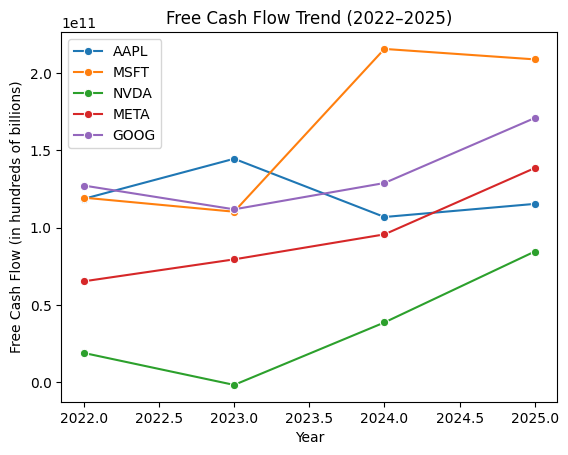

In [17]:
df_transposed = df_fcf.transpose()
df_transposed.index = df_transposed.index.astype(int) # Converts the year strings to numbers (e.g., '2022' becomes 2022)
df_transposed.sort_index(ascending=True, inplace=True)
sns.lineplot(data=df_transposed, dashes=False, marker='o')
plt.title('Free Cash Flow Trend (2022–2025)')
plt.ylabel('Free Cash Flow (in hundreds of billions)')
plt.xlabel('Year');

##Cash Conversion Ratio

In [18]:
#cash conversion ratio
#cash conversion ratio = opc/net income
#How much earnings the company actually receive from net income
#Reflect how true the company's income is
cash_conversion_ratio = []
for ticker in tickers:
  ticker = yf.Ticker(ticker)
  incomestatment = ticker.financials
  net_income = incomestatment.loc['Net Income']
  cf = ticker.cashflow
  opc = cf.loc['Cash Flow From Continuing Operating Activities']
  ccr = []
  for i,j in zip(opc, net_income): #loop over each year's opc and net income for each company
    k = i/j # each year's ccr
    ccr.append(k)
  cash_conversion_ratio.append(ccr)
df_ccr = pd.DataFrame(cash_conversion_ratio, columns=['2025','2024','2023','2022','2021'])
df_ccr.index = tickers
df_ccr.T.dropna()


,AAPL,MSFT,NVDA,META,GOOG
2025,1.261564,1.337124,0.879377,1.464529,1.251513
2024,1.139677,1.345058,0.943884,1.818840,1.378765
2023,1.223921,1.210348,1.291209,2.175647,1.525629
2022,1.098838,1.224051,0.933962,1.465151,1.205424


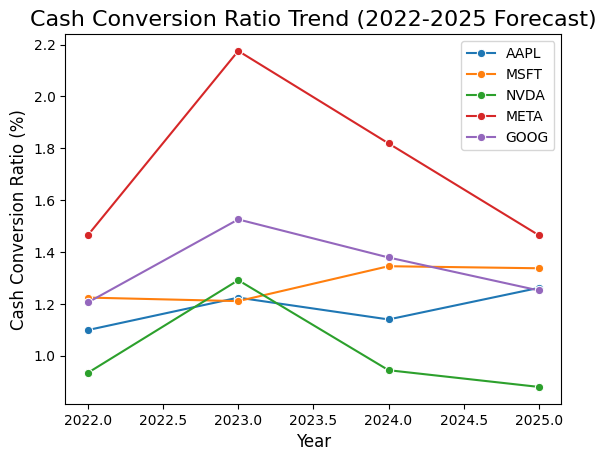

In [19]:
ccr_plot = df_ccr.transpose()
ccr_plot.index = ccr_plot.index.astype(int)
ccr_plot.sort_index(ascending=True, inplace=True)
sns.lineplot(
    data=ccr_plot,
    dashes=False,
    marker='o',
)

plt.title('Cash Conversion Ratio Trend (2022-2025 Forecast)', fontsize=16)
plt.ylabel('Cash Conversion Ratio (%)', fontsize=12)
plt.xlabel('Year', fontsize=12);

##Return on Invested Capital (ROIC ratio)

In [20]:
# ROIC = NOPAT / Invested Capital
# where NOPAT = EBIT * (1 - Tax Rate)

roic_ratio = []

for ticker in tickers:
    ticker = yf.Ticker(ticker)
    income = ticker.financials
    balance = ticker.balance_sheet

    ebit = income.loc['Operating Income']
    tax_rate = income.loc['Tax Rate For Calcs']
    invested_capital = balance.loc['Invested Capital']


    roic_each = []
    for e, t, ic in zip(ebit, tax_rate, invested_capital):
          nopat = e * (1 - t)
          roic_each.append((nopat / ic) * 100)
    roic_ratio.append(roic_each)

df_roic = pd.DataFrame(roic_ratio, columns=['2025', '2024', '2023', '2022', '2021'])
df_roic.index = tickers
df_roic = df_roic.T.dropna()

df_roic


,AAPL,MSFT,NVDA,META,GOOG
2025,57.171730,27.392358,80.441680,28.937999,27.966449
2024,56.281534,27.964460,55.071194,22.455348,24.581378
2023,58.619901,28.289920,13.329189,17.178271,23.398471
2022,50.295131,33.496127,26.226692,31.186388,24.940480


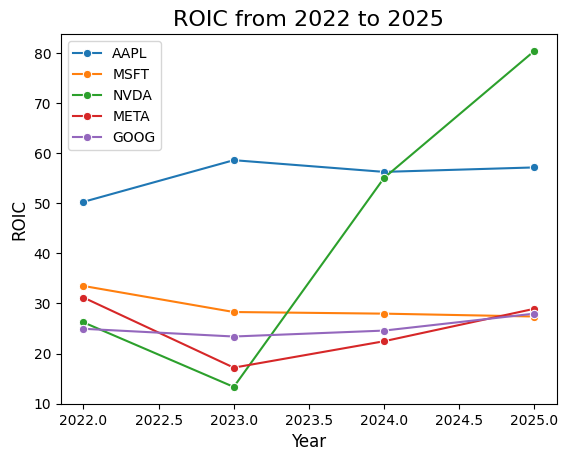

In [21]:
df_roic.index = df_roic.index.astype(int)
df_roic.sort_index(ascending=True, inplace=True)

sns.lineplot(
    data=df_roic,
    dashes=False,
    marker='o',)

plt.title('ROIC from 2022 to 2025', fontsize=16)
plt.ylabel('ROIC', fontsize=12)
plt.xlabel('Year', fontsize=12);

##Revenue

In [22]:
#Total Revenue
#Revenue growth reflects market demand and pricing power, possibly indicating a company's advantage in the industry
total_revenue = []
for ticker in tickers:
    ticker = yf.Ticker(ticker)
    income_statement = ticker.financials
    tr = income_statement.loc['Total Revenue']
    total_revenue.append(tr.values)
df_tr = pd.DataFrame(
    total_revenue,
    columns=['2025', '2024', '2023', '2022', '2021'],
    index=tickers)
df_tr = df_tr.T.dropna()
df_tr

,AAPL,MSFT,NVDA,META,GOOG
2025,3.910350e+11,2.817240e+11,1.304970e+11,1.645010e+11,3.500180e+11
2024,3.832850e+11,2.451220e+11,6.092200e+10,1.349020e+11,3.073940e+11
2023,3.943280e+11,2.119150e+11,2.697400e+10,1.166090e+11,2.828360e+11
2022,3.658170e+11,1.982700e+11,2.691400e+10,1.179290e+11,2.576370e+11


In [23]:
#Revenue change rate
growth_data = {}

for ticker in tickers:
    t = yf.Ticker(ticker)
    income = t.financials
    revenue = income.loc['Total Revenue']
    rev = list(revenue[::-1])#convert pandas series to list, flip its order so the first data is 2022 instead of 2025
    rev = rev[-4:]
    # Growth rates for the 3-year span, as growth rate for the first year, 2022, can not be computed
    rgr_2023 = ((rev[1] - rev[0]) / rev[0]) * 100
    rgr_2024 = ((rev[2] - rev[1]) / rev[1]) * 100
    rgr_2025 = ((rev[3] - rev[2]) / rev[2]) * 100

    growth_data[ticker] = [rgr_2023, rgr_2024, rgr_2025]
df_revenue_growth_rate = pd.DataFrame(growth_data, index=[2023, 2024, 2025]).round(2)
df_revenue_growth_rate


,AAPL,MSFT,NVDA,META,GOOG
2023,7.79,6.88,0.22,-1.12,9.78
2024,-2.80,15.67,125.85,15.69,8.68
2025,2.02,14.93,114.20,21.94,13.87


##Earnings per share

In [24]:
#EPS
#EPS Growth is significant to investors as they hold the company's stock and may benefit from increase in dividends paid due to EPS increases, also meaning that the price of shares itself would likely increase
EPS = []
for ticker in tickers:
    t = yf.Ticker(ticker)
    income_statement = t.financials
    eps = income_statement.loc['Diluted EPS']
    EPS.append(eps.values)
df_eps = pd.DataFrame(
    EPS,
    columns=['2025', '2024', '2023', '2022', '2021'],
    index=tickers)
df_eps = df_eps.T.dropna()
df_eps

,AAPL,MSFT,NVDA,META,GOOG
2025,6.08,13.64,2.940,23.86,8.04
2024,6.13,11.80,1.190,14.87,5.80
2023,6.11,9.68,0.174,8.59,4.56
2022,5.61,9.65,0.385,13.77,5.61


In [25]:
#EPS change rate
eps_growth = []
for ticker in tickers:
    t = yf.Ticker(ticker)
    income_statement = t.financials
    eps = income_statement.loc['Diluted EPS']
    eps = list(eps[::-1])
    eps = eps[-4:]
    g_2023 = ((eps[1] - eps[0]) / eps[0]) * 100       #growth rate of a specific year = (this year - last year)/last year *100%
    g_2024 = ((eps[2] - eps[1]) / eps[1]) * 100
    g_2025 = ((eps[3] - eps[2]) / eps[2]) * 100
    eps_growth.append([g_2023, g_2024, g_2025])
df_eps_growth = pd.DataFrame(
    eps_growth,
    columns=['2023', '2024', '2025'],
    index=tickers).T
df_eps_growth

,AAPL,MSFT,NVDA,META,GOOG
2023,8.912656,0.310881,-54.805195,-37.618010,-18.716578
2024,0.327332,21.900826,583.908046,73.108265,27.192982
2025,-0.815661,15.593220,147.058824,60.457297,38.620690


##Net income

In [26]:
#Net income
net_income = []
for ticker in tickers:
    t = yf.Ticker(ticker)
    income_statement = t.financials
    ni = income_statement.loc['Net Income']
    net_income.append(ni.values)
df_ni = pd.DataFrame(
    net_income,
    columns=['2025', '2024', '2023', '2022', '2021'],
    index=tickers)
df_ni = df_ni.T.dropna()
df_ni

,AAPL,MSFT,NVDA,META,GOOG
2025,9.373600e+10,1.018320e+11,7.288000e+10,6.236000e+10,1.001180e+11
2024,9.699500e+10,8.813600e+10,2.976000e+10,3.909800e+10,7.379500e+10
2023,9.980300e+10,7.236100e+10,4.368000e+09,2.320000e+10,5.997200e+10
2022,9.468000e+10,7.273800e+10,9.752000e+09,3.937000e+10,7.603300e+10


Net income for 2025 shown in descending order. So, in the order of which companies made the most money

In [41]:
df_ni.loc['2025'].sort_values(ascending=False)
df_ni.loc['2025'].rename('2025 Net Income in descending order', inplace=True)

,2025 Net Income in descending order
AAPL,9.373600e+10
MSFT,1.018320e+11
NVDA,7.288000e+10
META,6.236000e+10
GOOG,1.001180e+11


In [27]:
#Net income growth rate
ni_growth = []
for ticker in tickers:
    t = yf.Ticker(ticker)
    income_statement = t.financials
    ni = income_statement.loc['Net Income']
    ni = list(ni[::-1])
    ni = ni[-4:]
    g_2023 = ((ni[1] - ni[0]) / ni[0]) * 100
    g_2024 = ((ni[2] - ni[1]) / ni[1]) * 100
    g_2025 = ((ni[3] - ni[2]) / ni[2]) * 100
    ni_growth.append([g_2023, g_2024, g_2025])
df_ni_growth = pd.DataFrame(
    ni_growth,
    columns=['2023', '2024', '2025'],
    index=tickers).T
df_ni_growth

,AAPL,MSFT,NVDA,META,GOOG
2023,5.410858,-0.518299,-55.209188,-41.071882,-21.123723
2024,-2.813543,21.800417,581.318681,68.525862,23.049090
2025,-3.359967,15.539621,144.892473,59.496649,35.670438


##Operating Cashflow

In [28]:
#operating cash flow
#the cash generated from the company's core business operation
#key indicator to how well the company's business is going
OPC = []
for ticker in tickers:
    t = yf.Ticker(ticker)
    cashflow = t.cashflow
    opc = cashflow.loc['Cash Flow From Continuing Operating Activities']
    OPC.append(opc.values)
df_opc = pd.DataFrame(
    OPC,
    columns=['2025', '2024', '2023', '2022', '2021'],
    index=tickers)
df_opc = df_opc.T.dropna()
df_opc


,AAPL,MSFT,NVDA,META,GOOG
2025,1.182540e+11,1.361620e+11,6.408900e+10,9.132800e+10,1.252990e+11
2024,1.105430e+11,1.185480e+11,2.809000e+10,7.111300e+10,1.017460e+11
2023,1.221510e+11,8.758200e+10,5.640000e+09,5.047500e+10,9.149500e+10
2022,1.040380e+11,8.903500e+10,9.108000e+09,5.768300e+10,9.165200e+10


In [29]:
#operating cash flow growth rate
opc_growth = []
for ticker in tickers:
    t = yf.Ticker(ticker)
    cashflow = t.cashflow
    opc = cashflow.loc['Cash Flow From Continuing Operating Activities']
    opc = list(opc[::-1])
    opc = opc[-4:]
    g_2023 = ((opc[1] - opc[0]) / opc[0]) * 100
    g_2024 = ((opc[2] - opc[1]) / opc[1]) * 100
    g_2025 = ((opc[3] - opc[2]) / opc[2]) * 100
    opc_growth.append([g_2023, g_2024, g_2025])
df_opc_growth = pd.DataFrame(
    opc_growth,
    columns=['2023', '2024', '2025'],
    index=tickers).T
df_opc_growth

,AAPL,MSFT,NVDA,META,GOOG
2023,17.409985,-1.631942,-38.076416,-12.495883,-0.171300
2024,-9.502992,35.356580,398.049645,40.887568,11.203891
2025,6.975566,14.858117,128.155927,28.426589,23.148822


##Dividends amount

In [30]:
#Dividends

all_tickers_data = yf.Tickers(tickers)
dividends_data = {}

for ticker in tickers:
    ticker_object = all_tickers_data.tickers[ticker]

    divs = ticker_object.dividends
    divs_df = divs.reset_index()
    divs_df = divs_df.rename(columns={'Dividends': 'Dividend Amount'})

    divs_df['Ticker'] = ticker

    dividends_data[ticker] = divs_df
master_dividends_db = pd.concat(dividends_data.values(), ignore_index=True)

master_dividends_db = master_dividends_db[['Ticker', 'Date', 'Dividend Amount']]

master_dividends_db['Date'] = master_dividends_db['Date'].dt.tz_localize(None)   #Apply boolean indexing to filter the rows by date range
master_dividends_db = master_dividends_db[
    (master_dividends_db['Date'] >= pd.to_datetime('2021-01-01')) &
    (master_dividends_db['Date'] <= pd.to_datetime('2025-12-31'))
]
master_dividends_db.head()

,Ticker,Date,Dividend Amount
69,AAPL,2021-02-05,0.205
70,AAPL,2021-05-07,0.220
71,AAPL,2021-08-06,0.220
72,AAPL,2021-11-05,0.220
73,AAPL,2022-02-04,0.220


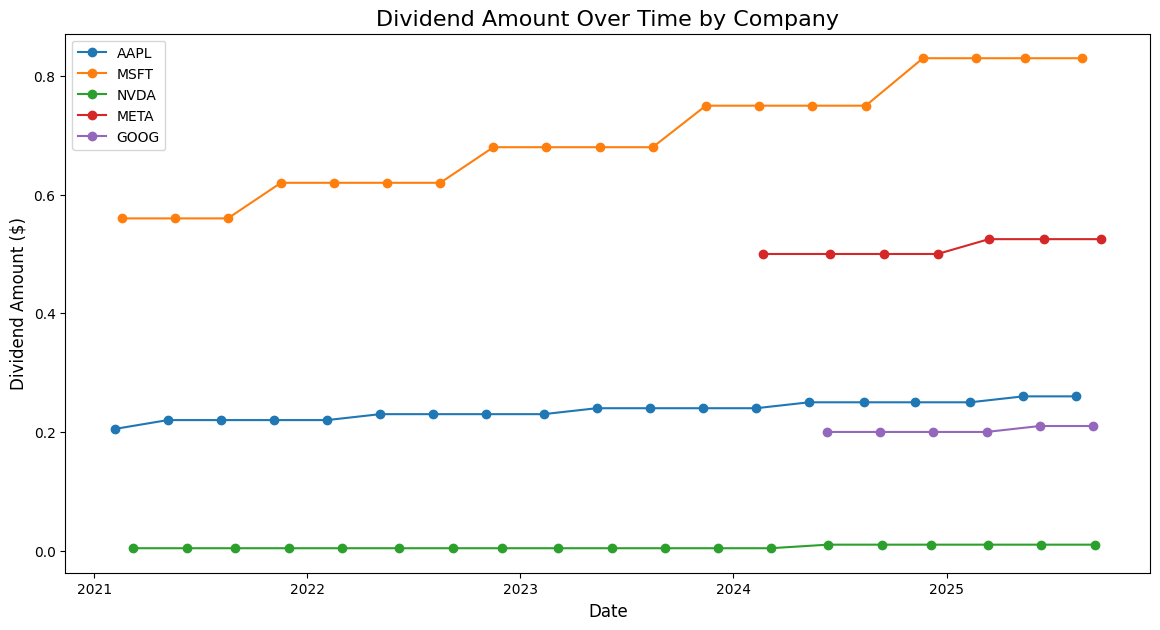

In [31]:
plt.figure(figsize=(14, 7))
for ticker in tickers:
  ticker_data = master_dividends_db[master_dividends_db['Ticker'] == ticker]
  plt.plot(
        ticker_data['Date'],
        ticker_data['Dividend Amount'],
        marker='o',
        label=ticker
    )
plt.title('Dividend Amount Over Time by Company', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Dividend Amount ($)', fontsize=12)
plt.legend(loc='upper left')

##Stock price High & Lows

In [32]:
#stock: high and lows

stock_data = yf.download(tickers, start="2021-01-01", end="2025-04-30", group_by='tickers')
monthly_last_value = stock_data.resample('M').last()
monthly_last_value

/tmp/ipython-input-2214615227.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(tickers, start="2021-01-01", end="2025-04-30", group_by='tickers')
[*********************100%***********************]  5 of 5 completed
/tmp/ipython-input-2214615227.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_last_value = stock_data.resample('M').last()


Ticker            GOOG                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2021-01-31   91.681102   92.232823   89.894826   91.163147  32252000   
2021-02-28  101.829159  102.846694  100.117870  101.150803  41670000   
2021-03-31  102.256238  103.954963  102.138293  102.728508  29198000   
2021-04-30  119.407370  120.532172  119.291661  119.686951  39142000   
2021-05-31  120.274923  120.581821  119.566272  119.758461  24108000   
2021-06-30  124.799517  124.944975  123.909558  124.464264  24006000   
2021-07-31  134.589978  134.848554  133.897906  134.301941  23954000   
2021-08-31  144.892941  145.118888  144.014447  144.473312  26756000   
2021-09-30  133.412019  134.668420  132.096028  132.359726  35294000   
2021-10-31  144.530947  147.602927  144.179849  147.262741  28954000   
2021-11-30  144.461677  145.631907  141.100417  141.483795  41590000   
2021-12-31  144.554778  145.370197  143.694166  143.696152  17298000   
2022-01-31  133.285894  134.920218  131.374975  134.776199  34056000   
2022-02-28  132.378595  134.718584  131.922472  133.974182  29676000   
2022-03-31  141.480320  141.674987  138.670053  138.700348  29516000   
2022-04-30  116.778851  118.151454  113.914450  114.185097  33694000   
2022-05-31  112.310434  115.642134  111.807376  113.263908  51302000   
2022-06-30  109.748467  110.573130  106.580646  108.629128  38046000   
2022-07-31  112.629245  116.105456  112.460402  115.847221  31336200   
2022-08-31  110.871282  111.010330  108.308823  108.408142  25898000   
2022-09-30   97.065761   98.817772   95.377311   95.496498  26277800   
2022-10-31   95.129007   95.695133   93.738521   94.016624  29868700   
2022-11-30   94.473497  100.760468   94.026551  100.760468  39888100   
2022-12-31   86.771202   88.226249   86.438480   88.126930  19190300   
2023-01-31   97.194882   99.230952   97.125358   99.191223  22306800   
2023-02-28   88.931420   90.828434   88.911552   89.686256  30546900   
2023-03-31  101.018708  103.481855  100.750546  103.293144  28108000   
2023-04-30  107.067315  107.553983  105.319275  107.484459  23957900   
2023-05-31  122.859238  124.051086  122.263317  122.531487  41548800   
2023-06-30  120.276918  121.200597  120.058412  120.147804  23871800   
2023-07-31  132.105981  132.920415  131.231972  132.205307  18381900   
2023-08-31  136.118525  137.459340  135.890092  136.416489  28147900   
2023-09-30  133.168681  133.973173  130.427446  130.953842  23237300   
2023-10-31  125.411765  125.699795  123.082710  124.448364  21123400   
2023-11-30  135.472890  136.029096  131.887426  133.009750  29913500   
2023-12-31  139.723837  140.473710  138.949139  139.972137  14881000   
2024-01-31  144.401824  144.600461  140.587927  140.836227  43908600   
2024-02-29  137.409668  138.998784  136.634970  138.829941  35485000   
2024-03-31  150.966886  151.632330  150.301441  151.225113  21105600   
2024-04-30  166.242379  168.715445  163.381948  163.520996  29420800   
2024-05-31  172.221442  173.234514  169.807966  172.777649  28085200   
2024-06-30  184.667600  185.522728  182.286168  182.380630  23032400   
2024-07-31  173.928813  174.913209  170.746949  172.168839  15650200   
2024-08-31  163.289437  164.343428  162.484029  164.174393  18498800   
2024-09-30  164.061954  166.630714  163.922565  166.461456  14070100   
2024-10-31  173.958653  177.642527  171.808062  171.937500  32801900   
2024-11-30  169.318936  170.125404  168.014647  169.747070   9250700   
2024-12-31  191.823774  192.626168  188.968017  189.825241  14355200   
2025-01-31  203.057385  206.411528  202.922826  204.936310  17060300   
2025-02-28  169.750262  171.943157  167.846424  171.664062  30049800   
2025-03-31  154.486065  156.801217  151.891514  155.903091  33591600   
2025-04-30  161.705933  162.339599  159.056490  161.720901  15955200   

Ticker            MSFT                 

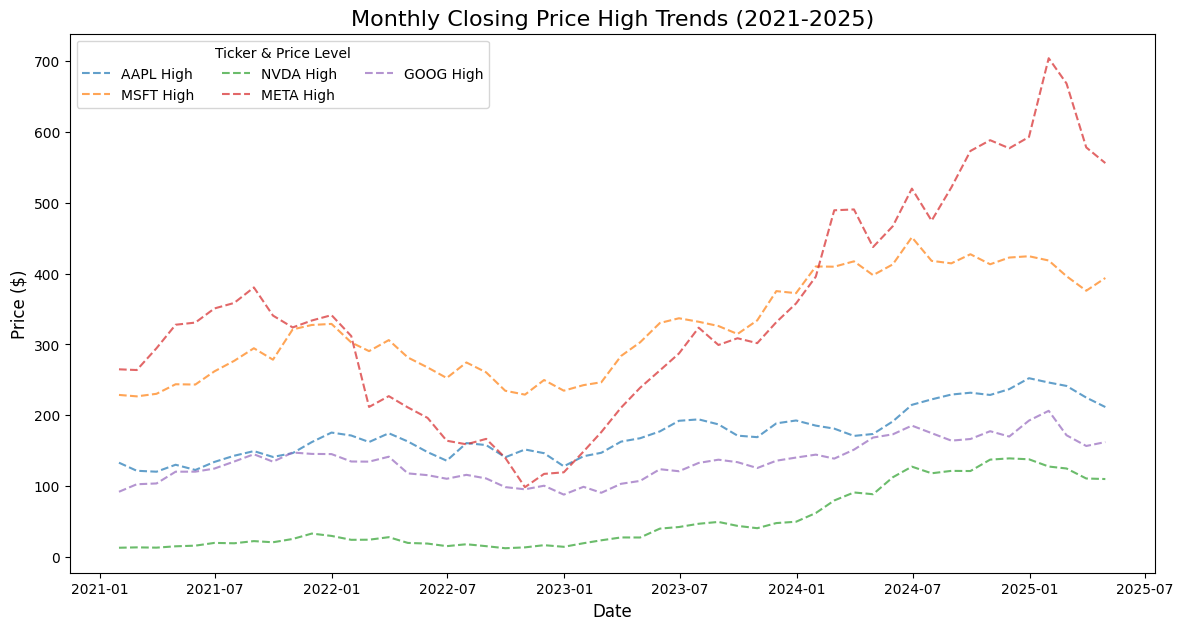

In [33]:
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(monthly_last_value.index, monthly_last_value[(ticker, 'High')].values,
             linestyle='--',
             alpha=0.7,
             label=f'{ticker} High')

plt.title('Monthly Closing Price High Trends (2021-2025)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend(title='Ticker & Price Level', ncol=3)

#Final DataFrame focused on growth datas-- Percentages of Change (Earnings per share; Revenue; net income; operating cashflow)

In [34]:
#large Dataframe combining datas we would like to focus on oberserving growth from
data_dict = {
    'EPS change rate (%)': df_eps_growth,
    'Revenue change rate (%)': df_revenue_growth_rate,
    'Net Income change rate (%)': df_ni_growth,
    'Operating Cashflow change rate (%)': df_opc_growth}
big_df = pd.concat(data_dict)
big_df


AAPL       MSFT        NVDA  \
EPS change rate (%)                2023   8.912656   0.310881  -54.805195   
                                   2024   0.327332  21.900826  583.908046   
                                   2025  -0.815661  15.593220  147.058824   
Revenue change rate (%)            2023   7.790000   6.880000    0.220000   
                                   2024  -2.800000  15.670000  125.850000   
                                   2025   2.020000  14.930000  114.200000   
Net Income change rate (%)         2023   5.410858  -0.518299  -55.209188   
                                   2024  -2.813543  21.800417  581.318681   
                                   2025  -3.359967  15.539621  144.892473   
Operating Cashflow change rate (%) 2023  17.409985  -1.631942  -38.076416   
                                   2024  -9.502992  35.356580  398.049645   
                                   2025   6.975566  14.858117  128.155927   

                                              META       GOOG  
EPS change rate (%)                2023 -37.618010 -18.716578  
                                   2024  73.108265  27.192982  
                                   2025  60.457297  38.620690  
Revenue change rate (%)            2023  -1.120000   9.780000  
                                   2024  15.690000   8.680000  
                                   2025  21.940000  13.870000  
Net Income change rate (%)         2023 -41.071882 -21.123723  
                                   2024  68.525862  23.049090  
                                   2025  59.496649  35.670438  
Operating Cashflow change rate (%) 2023 -12.495883  -0.171300  
                                   2024  40.887568  11.203891  
                                   2025  28.426589  23.148822

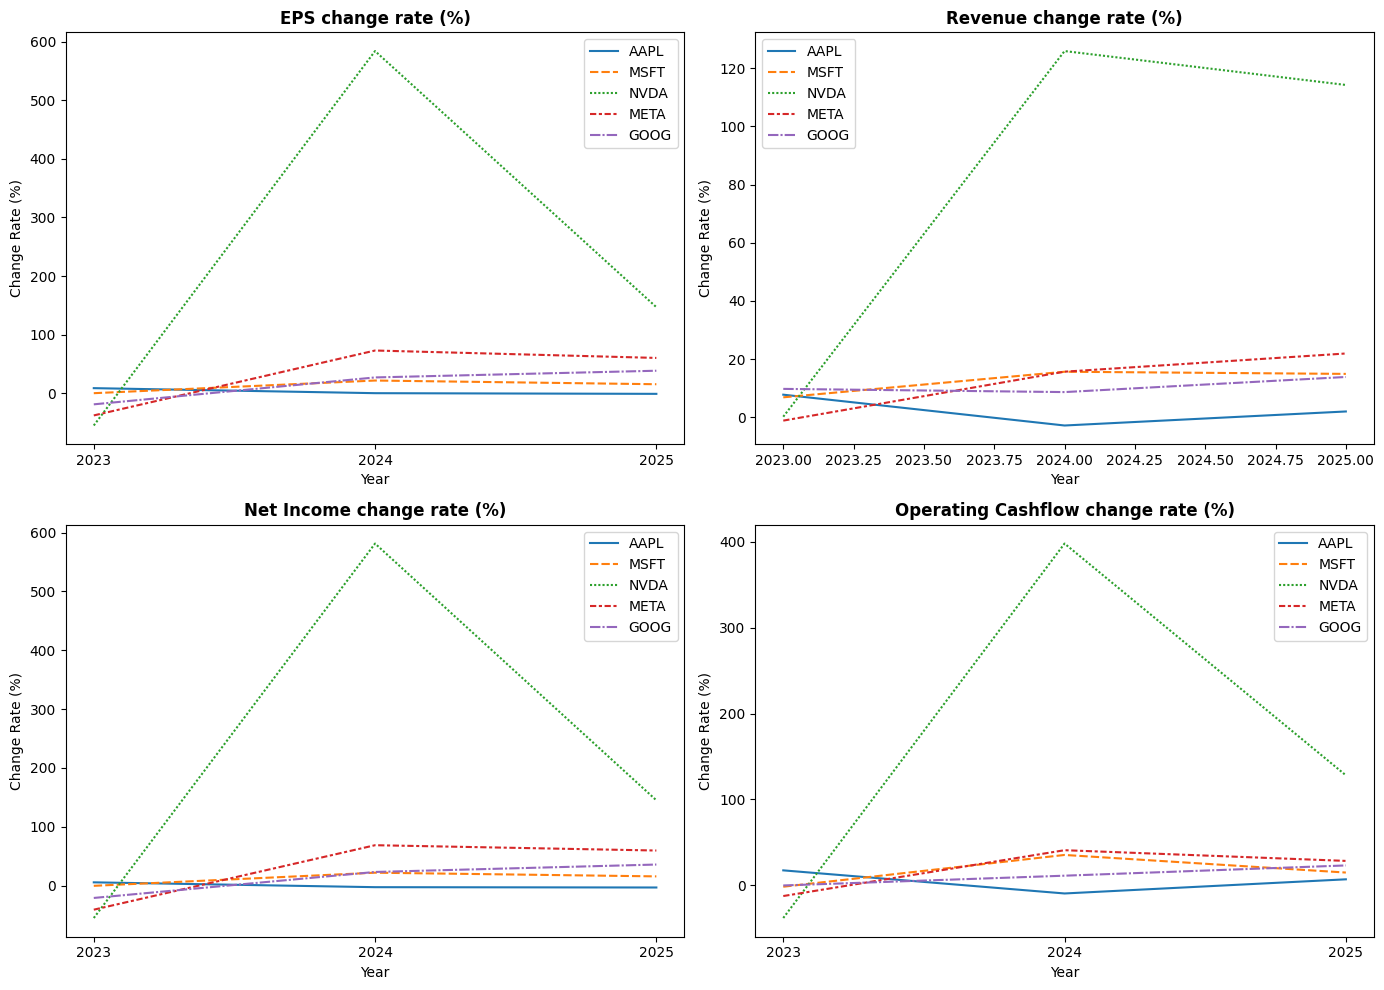

In [35]:
#Large Dataframe Visualizations
num_rows = 2
num_cols = 2
data_index = 0
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 10)) #create subplots

plot_keys = list(data_dict.keys())

for row in range(num_rows):
    for col in range(num_cols):

        # Stop if we run out of data
        if data_index >= len(plot_keys):
            break

        data = plot_keys[data_index]
        ax= axes[row, col]

        df_data = big_df.loc[data]
        sns.lineplot(data=df_data, ax = ax)

        ax.set_title(data, fontweight='bold')
        ax.set_xlabel('Year')
        ax.set_ylabel('Change Rate (%)')

        data_index += 1

plt.tight_layout()
plt.show()

##Investment Valuation Model 1 -- Based on Forward PE ratio & cash conversion ratio

In [36]:
ccr_latest_series = ccr_plot.iloc[-1]
df_ccr_latest = pd.DataFrame(ccr_latest_series).rename(columns={ccr_latest_series.name: 'Latest CCR'})

In [37]:
df_evaluation = pe_df[['Forward P/E']].merge(
    df_ccr_latest,
    left_index=True,
    right_index=True
)

df_evaluation    #dataframe combining both the forward P/E and 2025 CCR data

,Forward P/E,Latest CCR
AAPL,31.226230,1.261564
MSFT,34.814716,1.337124
NVDA,44.233013,0.879377
META,29.050396,1.464529
GOOG,28.345253,1.251513


In [38]:
#function to figure out which company is best to invest in
def evaluate_investments(df_metrics):

  df_metrics['Investment Score'] = (
        df_metrics['Latest CCR'] / df_metrics['Forward P/E']
    )

  df_metrics['Investment Rank'] = df_metrics['Investment Score'].rank(
        ascending=False, method='min'
    ).astype(int)

  df_metrics.sort_values(
        by='Investment Score', ascending=False, inplace=True
    )

  return df_metrics[['Forward P/E', 'Latest CCR', 'Investment Score', 'Investment Rank']]


In [39]:
df_ranked = evaluate_investments(df_evaluation)
df_ranked

,Forward P/E,Latest CCR,Investment Score,Investment Rank
META,29.050396,1.464529,0.050413,1
GOOG,28.345253,1.251513,0.044152,2
AAPL,31.226230,1.261564,0.040401,3
MSFT,34.814716,1.337124,0.038407,4
NVDA,44.233013,0.879377,0.019881,5
